In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Make a reference to the crimes.csv file path
csv_path = "/Users/jstrawin/Desktop/Project3/Resources/Crimes_2019.csv"

# Import the crimes.csv file as a DataFrame
crimes_df = pd.read_csv(csv_path, encoding="utf-8")
crimes_df = crimes_df.dropna()
crimes_df['Date'] = pd.to_datetime(crimes_df['Date']).dt.date
crimes_df['Date'] = pd.to_datetime(crimes_df.Date,format='%Y-%m-%d %H:%M')
crimes_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11858381,JC469488,2019-10-11,021XX W 72ND PL,0810,THEFT,OVER $500,STREET,False,False,...,-87.676928,"(41.762038621, -87.676927902)",17.0,22257.0,65.0,433.0,31.0,23.0,17.0,7.0
1,11858167,JC469480,2019-10-11,046XX W HARRISON ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.741427,"(41.873224961, -87.741426819)",36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0
2,11858286,JC469479,2019-10-11,081XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,-87.605120,"(41.747170897, -87.605119541)",9.0,21546.0,40.0,247.0,35.0,61.0,20.0,235.0
3,11858203,JC469489,2019-10-11,005XX W 61ST PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.638476,"(41.782606021, -87.638476359)",53.0,21559.0,66.0,166.0,4.0,11.0,17.0,135.0
4,11858205,JC469526,2019-10-11,007XX E 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,GAS STATION,False,False,...,-87.605637,"(41.707455731, -87.605637491)",9.0,21861.0,47.0,643.0,35.0,19.0,10.0,250.0


In [3]:
### Check how many arrest are there
crimes_df.Arrest.value_counts()

False    157621
True      42667
Name: Arrest, dtype: int64

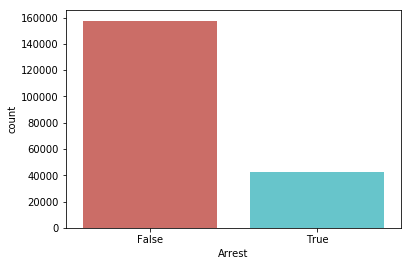

In [4]:
crimes_df.Arrest.value_counts()
sns.countplot(x = 'Arrest', data = crimes_df, palette = 'hls')
plt.show()

In [48]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "IUCR", "Primary Type", Arrest", "Community Area", "Date"

reduced_df = crimes_df.drop(["ID", "Case Number", "Block", "Description", "X Coordinate", "Y Coordinate", "Year", "Updated On",\
                             "Latitude", "Longitude", "Location","Boundaries - ZIP Codes", "Zip Codes","Historical Wards 2003-2015"\
                            ,"Census Tracts", "Police Districts", "Location Description", "Domestic", "Beat", "District", "FBI Code", "Community Areas", "Wards", "Police Beats"], axis=1)
reduced_df.head()

,Date,IUCR,Primary Type,Arrest,Ward,Community Area
0,2019-10-11,0810,THEFT,False,17.0,67.0
1,2019-10-11,143A,WEAPONS VIOLATION,True,24.0,25.0
2,2019-10-11,0460,BATTERY,False,8.0,44.0
3,2019-10-11,143A,WEAPONS VIOLATION,True,20.0,68.0
4,2019-10-11,1310,CRIMINAL DAMAGE,False,9.0,50.0


In [51]:
reduced_df.groupby('IUCR').agg(['mean', 'count'])

Arrest             Ward       Community Area      
          mean count       mean count           mean count
IUCR                                                      
0110  0.165829   398  19.937186   398      41.942211   398
0142  1.000000     4  11.000000     4      54.500000     4
0261  0.028571    35  18.457143    35      43.885714    35
0262  0.000000     1  17.000000     1      66.000000     1
0263  0.181818    22  20.818182    22      45.045455    22
0264  0.142857     7  24.428571     7      34.285714     7
0265  0.047059   170  23.770588   170      34.029412   170
0266  0.144578    83  20.228916    83      41.831325    83
0271  0.000000     3  32.666667     3      38.333333     3
0273  0.000000     5  18.200000     5      39.800000     5
0274  0.000000     1  17.000000     1      71.000000     1
0275  0.222222     9  25.222222     9      50.666667     9
0281  0.033918   855  25.319298   855      33.061988   855
0291  0.166667    60  24.116667    60      33.816667    60
0312  0.113475   282  23.730496   282      36.017730   282
0313  0.087649   251  23.912351   251      35.629482   251
031A  0.055165  1994  20.260281  1994      40.362086  1994
031B  0.030303    33  17.121212    33      45.363636    33
0320  0.082096  2156  23.511596  2156      33.913265  2156
0325  0.073529   136  20.764706   136      38.272059   136
0326  0.077441   297  20.946128   297      37.653199   297
0330  0.157270   337  23.649852   337      35.780415   337
0331  0.263158    38  24.000000    38      33.868421    38
0334  0.137931    58  20.534483    58      35.931034    58
0337  0.108696    46  21.086957    46      38.195652    46
033A  0.063218   174  21.074713   174      38.109195   174
033B  0.200000     5  24.200000     5      31.200000     5
0340  0.111111   261  24.475096   261      31.850575   261
041A  0.052632  1254  20.037480  1254      42.377193  1254
041B  0.250000     4  22.250000     4      44.500000     4
...        ...   ...        ...   ...            ...   ...
4650  0.603922   255  17.933333   255      42.549020   255
4651  0.173611   144  18.590278   144      46.673611   144
4652  0.666667     3   8.666667     3      47.000000     3
4740  1.000000     1  27.000000     1      23.000000     1
4800  0.000000     2  37.000000     2      19.000000     2
4860  1.000000     7  35.857143     7      70.285714     7
5000  0.079156   379  21.427441   379      39.857520   379
5001  0.114833   209  21.990431   209      39.722488   209
5002  0.117886   984  20.263211   984      42.533537   984
5003  0.000000     5  21.200000     5      27.200000     5
5004  0.000000    27  20.703704    27      37.222222    27
5007  0.783019   106  20.820755   106      42.990566   106
5009  1.000000     2  26.500000     2      16.500000     2
500E  0.000000     4  37.750000     4      27.500000     4
500N  0.066667    15  25.800000    15      30.333333    15
5011  0.179856   278  22.158273   278      35.762590   278
5013  1.000000     1   8.000000     1      46.000000     1
501A  0.087591   137  20.941606   137      40.686131   137
501H  0.000000     2  16.000000     2      26.500000     2
502P  0.662216   749  18.838451   749      45.238985   749
502R  0.834609   653  17.646248   653      46.295559   653
502T  0.166667    18  18.888889    18      47.611111    18
5110  0.991597   119  17.462185   119      44.722689   119
5111  0.981818   385  17.779221   385      45.451948   385
5112  0.976744   172  16.255814   172      44.877907   172
5114  0.000000     1  31.000000     1      19.000000     1
5121  0.750000     4  14.750000     4      52.750000     4
5130  0.625000    24  15.833333    24      52.583333    24
5131  0.682927    41  19.487805    41      42.268293    41
5132  0.882353    17  20.941176    17      52.235294    17

[312 rows x 6 columns]

In [52]:
reduced_df.groupby('Primary Type').agg(['mean', 'count'])

Arrest              Ward         \
                                       mean  count       mean  count   
Primary Type                                                           
ARSON                              0.074205    283  22.335689    283   
ASSAULT                            0.179414  16409  21.612530  16409   
BATTERY                            0.203930  39239  21.903489  39239   
BURGLARY                           0.051950   7411  22.718122   7411   
CONCEALED CARRY LICENSE VIOLATION  0.971910    178  22.067416    178   
CRIM SEXUAL ASSAULT                0.053557   1251  24.412470   1251   
CRIMINAL DAMAGE                    0.061973  21009  22.468513  21009   
CRIMINAL TRESPASS                  0.555473   5381  23.980859   5381   
DECEPTIVE PRACTICE                 0.048965  12417  26.410808  12417   
GAMBLING                           1.000000    129  22.968992    129   
HOMICIDE                           0.174129    402  19.848259    402   
HUMAN TRAFFICKING                  0.000000     10  19.600000     10   
INTERFERENCE WITH PUBLIC OFFICER   0.961265   1265  19.159684   1265   
INTIMIDATION                       0.043478    138  23.579710    138   
KIDNAPPING                         0.068702    131  22.396947    131   
LIQUOR LAW VIOLATION               0.989305    187  24.727273    187   
MOTOR VEHICLE THEFT                0.053364   6971  23.094535   6971   
NARCOTICS                          0.999365  11031  23.022845  11031   
NON-CRIMINAL                       0.000000      4  15.750000      4   
OBSCENITY                          0.904762     42  25.309524     42   
OFFENSE INVOLVING CHILDREN         0.114035   1824  20.156798   1824   
OTHER NARCOTIC VIOLATION           0.500000      4  31.500000      4   
OTHER OFFENSE                      0.220496  13134  21.557104  13134   
PROSTITUTION                       1.000000    539  22.608534    539   
PUBLIC INDECENCY                   1.000000      9  25.777778      9   
PUBLIC PEACE VIOLATION             0.691814   1246  23.372392   1246   
ROBBERY                            0.081081   6068  22.184080   6068   
SEX OFFENSE                        0.122574    979  24.184883    979   
STALKING                           0.124294    177  22.531073    177   
THEFT                              0.097254  47371  25.768951  47371   
WEAPONS VIOLATION                  0.667459   5049  19.175480   5049   

                                  Community Area         
                                            mean  count  
Primary Type                                             
ARSON                                  40.141343    283  
ASSAULT                                39.854104  16409  
BATTERY                                38.993501  39239  
BURGLARY                               38.039806   7411  
CONCEALED CARRY LICENSE VIOLATION      51.297753    178  
CRIM SEXUAL ASSAULT                    34.554756   1251  
CRIMINAL DAMAGE                        38.550383  21009  
CRIMINAL TRESPASS                      36.012451   5381  
DECEPTIVE PRACTICE                     31.776194  12417  
GAMBLING                               36.410853    129  
HOMICIDE                               42.067164    402  
HUMAN TRAFFICKING                      42.000000     10  
INTERFERENCE WITH PUBLIC OFFICER       43.448221   1265  
INTIMIDATION                           37.210145    138  
KIDNAPPING                             39.458015    131  
LIQUOR LAW VIOLATION                   29.278075    187  
MOTOR VEHICLE THEFT                    36.739779   6971  
NARCOTICS                              35.889584  11031  
NON-CRIMINAL                           40.000000      4  
OBSCENITY                              29.261905     42  
OFFENSE INVOLVING CHILDREN             42.023575   1824  
OTHER NARCOTIC VIOLATION               22.750000      4  
OTHER OFFENSE                          40.135374  13134  
PROSTITUTION                           33.421150    539  
PUBLIC INDECENCY      

In [53]:
reduced_df.groupby('Community Area').agg(['mean', 'count'])

Arrest              Ward       
                    mean  count       mean  count
Community Area                                   
1.0             0.145473   2949  48.607664   2949
2.0             0.116997   2624  47.502668   2624
3.0             0.189010   2566  46.371005   2566
4.0             0.120805   1341  42.181954   1341
5.0             0.095135    925  41.557838    925
6.0             0.147213   4592  43.805967   4592
7.0             0.075353   3331  32.887121   3331
8.0             0.178206   9590  29.924713   9590
9.0             0.080925    173  41.000000    173
10.0            0.122402    866  41.424942    866
11.0            0.146053    760  44.550000    760
12.0            0.069164    347  40.481268    347
13.0            0.079805    614  40.866450    614
14.0            0.129275   1725  35.281739   1725
15.0            0.148066   2249  37.606936   2249
16.0            0.105895   1917  36.348983   1917
17.0            0.131394    997  36.577733    997
18.0            0.097156    422  33.213270    422
19.0            0.184297   3337  32.887024   3337
20.0            0.215075    995  32.002010    995
21.0            0.149208   1642  32.261267   1642
22.0            0.152075   3735  21.454886   3735
23.0            0.375422   6217  29.441210   6217
24.0            0.119218   5578  11.167981   5578
25.0            0.244423  11341  31.666432  11341
26.0            0.458036   4897  27.318358   4897
27.0            0.292966   3625  26.846621   3625
28.0            0.168956   7061  27.253222   7061
29.0            0.391972   6901  24.215621   6901
30.0            0.253371   3560  19.044944   3560
...                  ...    ...        ...    ...
48.0            0.245179   1089   7.672176   1089
49.0            0.255569   5118  18.616843   5118
50.0            0.324532    909   8.697470    909
51.0            0.268327   1405   8.202135   1405
52.0            0.240691    752  10.000000    752
53.0            0.217835   2938  24.154867   2938
54.0            0.245902   1098   9.000000   1098
55.0            0.135734    361  10.000000    361
56.0            0.175378   1454  19.129298   1454
57.0            0.133768    613  15.203915    613
58.0            0.172919   1706  13.651231   1706
59.0            0.158805    636  13.272013    636
60.0            0.177318   1111  11.000000   1111
61.0            0.230046   3295  16.425493   3295
62.0            0.171108    713  18.844320    713
63.0            0.200963   1662  14.991576   1662
64.0            0.129602    679  14.840943    679
65.0            0.137255   1275  16.533333   1275
66.0            0.190443   4311  17.278358   4311
67.0            0.252463   5177  15.589337   5177
68.0            0.259386   4688  12.368174   4688
69.0            0.236782   5258   8.412704   5258
70.0            0.117718   1665  17.988589   1665
71.0            0.261186   5900  19.031864   5900
72.0            0.091043    681  19.634361    681
73.0            0.233645   2461  24.527834   2461
74.0            0.142857    308  19.000000    308
75.0            0.213499   1452  28.638430   1452
76.0            0.213373   1017  40.920354   1017
77.0            0.122627   1949  46.608517   1949

[77 rows x 4 columns]

In [54]:
reduced_df.groupby('Ward').agg(['mean', 'count'])

Arrest        Community Area       
          mean  count           mean  count
Ward                                       
1.0   0.156868   3691      23.106746   3691
2.0   0.147958   4089      12.367327   4089
3.0   0.207097   5664      37.255297   5664
4.0   0.158661   5288      35.616112   5288
5.0   0.152944   4603      43.742559   4603
6.0   0.249374   7583      63.248714   7583
7.0   0.240728   5824      45.396635   5824
8.0   0.235350   6348      46.735192   6348
9.0   0.257797   6156      50.884178   6156
10.0  0.259921   2797      49.795495   2797
11.0  0.170509   2299      49.332753   2299
12.0  0.229249   2530      45.836759   2530
13.0  0.136126   1719      63.149506   1719
14.0  0.181938   2270      59.759031   2270
15.0  0.199267   3001      62.854049   3001
16.0  0.241710   6152      66.147594   6152
17.0  0.260758   6600      66.835909   6600
18.0  0.143378   2741      68.662532   2741
19.0  0.131615   1474      73.474220   1474
20.0  0.212595   6336      52.354167   6336
21.0  0.239642   6372      65.179849   6372
22.0  0.233898   2655      33.487759   2655
23.0  0.167975   1911      61.562009   1911
24.0  0.389126   8663      28.359113   8663
25.0  0.190605   3683      30.576161   3683
26.0  0.195897   2925      23.079658   2925
27.0  0.269780   9593      22.414156   9593
28.0  0.353311  10178      26.402731  10178
29.0  0.191399   4488      24.492870   4488
30.0  0.143888   2078      18.397498   2078
31.0  0.196861   2230      19.048430   2230
32.0  0.094911   2476      16.348546   2476
33.0  0.124161   1788      16.280761   1788
34.0  0.233910   5143      58.839004   5143
35.0  0.161005   2149      19.093067   2149
36.0  0.158088   2176      18.487592   2176
37.0  0.281683   6060      24.406601   6060
38.0  0.134897   1364      17.223607   1364
39.0  0.090064   1721      13.653109   1721
40.0  0.134837   2084      15.129079   2084
41.0  0.164477   1903      44.315817   1903
42.0  0.149360  12808      21.351655  12808
43.0  0.075966   2330       7.029185   2330
44.0  0.149390   3280       6.000000   3280
45.0  0.145865   1947      13.323575   1947
46.0  0.201861   2472       3.815534   2472
47.0  0.090169   1719       4.591041   1719
48.0  0.133168   2020      61.980198   2020
49.0  0.143052   2929       1.038580   2929
50.0  0.108696   1978       2.593023   1978

In [22]:
reduced_df["IUCR"].value_counts()

0486    18620
0820    17483
0460    13127
0810    11133
0560    11074
1310    10101
1320     9544
0860     8195
0890     7953
0910     6067
0610     4234
143A     3257
1330     3238
1150     3001
2820     2816
0620     2678
1153     2333
051A     2177
0320     2156
2024     2108
2826     2066
031A     1994
2825     1942
1130     1835
0870     1822
0430     1460
4387     1441
0520     1329
041A     1254
2027     1184
        ...  
1535        2
5009        2
1055        2
501H        2
1564        2
3910        2
0450        2
1850        2
1241        2
1840        2
4800        2
3966        2
5114        1
1682        1
1576        1
2895        1
1515        1
5013        1
2251        1
0262        1
3980        1
0274        1
1580        1
0581        1
4740        1
3961        1
0928        1
0938        1
2040        1
1525        1
Name: IUCR, Length: 312, dtype: int64

In [28]:
options = ['0486', '0820', '0460', '0810', '0560', '1310', '1320', '0860', '0890', '0910']   

# selecting rows based on condition 
crimes_df = reduced_df[reduced_df['IUCR'].isin(options)] 


crimes_df.groupby('IUCR').agg(['mean', 'count'])

Arrest        Community Area       
          mean  count           mean  count
IUCR                                       
0460  0.170184  13127      35.243011  13127
0486  0.211815  18620      41.158915  18620
0560  0.136265  11074      39.516254  11074
0810  0.030450  11133      32.337106  11133
0820  0.035406  17483      34.801750  17483
0860  0.424649   8195      30.773520   8195
0890  0.012700   7953      27.351565   7953
0910  0.042525   6067      36.854294   6067
1310  0.073953  10101      40.756856  10101
1320  0.036253   9544      36.455260   9544

In [42]:
reduced_df.Arrest = reduced_df.Arrest.astype(int)
new_df = reduced_df
new_df.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,IUCR,Primary Type,Arrest,Community Area
0,2019,10,11,0,284,41,41,4,4,4,0810,THEFT,0,67.0
1,2019,10,11,0,284,41,41,4,4,4,143A,WEAPONS VIOLATION,1,25.0
2,2019,10,11,0,284,41,41,4,4,4,0460,BATTERY,0,44.0
3,2019,10,11,0,284,41,41,4,4,4,143A,WEAPONS VIOLATION,1,68.0
4,2019,10,11,0,284,41,41,4,4,4,1310,CRIMINAL DAMAGE,0,50.0


In [ ]:
# Obtain the x and y coordinates for each of the three city types
city_type_urban = combined_df[combined_df["type"] == "Urban"].groupby([combined_df["city"]])
city_type_suburban = combined_df[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])
city_type_rural = combined_df[combined_df["type"] == "Rural"].groupby([combined_df["city"]])

# Calculation for Average Fare($) Per City
y_urban = city_type_urban["fare"].mean()
y_suburban = city_type_suburban["fare"].mean()
y_rural = city_type_rural["fare"].mean()

# Calculation for Total Number of Rides Per City
x_urban = city_type_urban["ride_id"].count()
x_suburban = city_type_suburban["ride_id"].count()
x_rural = city_type_rural["ride_id"].count()

# Calculation for Total Number of Drivers Per City
s_urban = city_type_urban["driver_count"].count()
s_suburban = city_type_suburban["driver_count"].count()
s_rural = city_type_rural["driver_count"].count()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, marker="o", color=["gold"], edgecolor="black", s=s_urban * 10, label = "Urban", alpha = 0.75, linewidth=1)
plt.scatter(x_suburban, y_suburban, marker="o", color=["skyblue"], edgecolor="black", s=s_suburban  * 10, label = "Suburban", alpha = 0.75, linewidth=1)
plt.scatter(x_rural, y_rural, marker="o", color=["coral"], edgecolor="black", s=s_rural * 10, label = "Rural", alpha = 0.75, linewidth=1)
plt.grid()

# Incorporate the other graph properties -- not sure what else?

# Create a legend
legend = plt.legend(loc="best", fontsize="small", title= "City Types", fancybox=True) 

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(45,40, "Note: \nCircle size correlates with driver count per city.", fontsize="small", color='red')

# Save Figure
plt.savefig("../Images/PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()

In [ ]:
# Calculate Percent of Total Rides by City Type
rides_type = type_df["ride_id"].count()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(rides_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("..//Images/PercentofTotalRidesbyCityType.png")

# Show Figure
plt.show()

In [69]:
# Push the remade DataFrame to a new CSV file
new_df.to_csv("Output/new_df_clean_6.csv",
                  encoding="utf-8", index=False, header=True)